In [1]:
# importing part of libraries into the project
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.layers import Embedding,LSTM, Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Dataset implementation part
df = pd.read_csv('labeled_data.csv')

In [3]:
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [4]:
# dropping the unwanted features
df = df[['tweet', 'class']]
df.head()

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [5]:
df.shape

(24783, 2)

In [6]:
# describing the variables in the dataset
df.describe()

,class
count,24783.000000
mean,1.110277
std,0.462089
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [7]:
# Preprocess the data
X = df['tweet'].values
y = df['class'].values

In [8]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

In [9]:
# Pad the sequences to have the same length
X_padded = pad_sequences(X_seq)

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# LSTM

In [11]:
# Define the model LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=X_padded.shape[1]))
model_lstm.add(LSTM(100))
model_lstm.add(Dense(3, activation='softmax'))  # 3 classes: 0, 1, 2

In [12]:
# Compile the model
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# Train the model
model_lstm.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5


496/496 [==============================] - 52s 96ms/step - loss: 0.4545 - accuracy: 0.8448 - val_loss: 0.2965 - val_accuracy: 0.9029
Epoch 2/5
496/496 [==============================] - 44s 90ms/step - loss: 0.2174 - accuracy: 0.9271 - val_loss: 0.2735 - val_accuracy: 0.9072
Epoch 3/5
496/496 [==============================] - 45s 91ms/step - loss: 0.1155 - accuracy: 0.9631 - val_loss: 0.3625 - val_accuracy: 0.8913
Epoch 4/5
496/496 [==============================] - 44s 89ms/step - loss: 0.0593 - accuracy: 0.9805 - val_loss: 0.4113 - val_accuracy: 0.8891
Epoch 5/5
496/496 [==============================] - 45s 90ms/step - loss: 0.0339 - accuracy: 0.9895 - val_loss: 0.5032 - val_accuracy: 0.8835


In [14]:
accuracy_lstm = model_lstm.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {accuracy_lstm}")

155/155 [==============================] - 4s 23ms/step - loss: 0.5638 - accuracy: 0.8669
Test Accuracy: 0.8668549656867981


In [15]:
y_pred= model_lstm.predict(X_test)
round_predictions = [round(pred[0]) for pred in y_pred]
print("\nclassification_report:")
print(classification_report(y_test, round_predictions ))

155/155 [==============================] - 4s 23ms/step

classification_report:
              precision    recall  f1-score   support

           0       0.05      0.79      0.09       290
           1       0.51      0.02      0.05      3832
           2       0.00      0.00      0.00       835

    accuracy                           0.06      4957
   macro avg       0.19      0.27      0.05      4957
weighted avg       0.40      0.06      0.04      4957



C:\Users\jahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# RNN

In [16]:
# Define the model RNN
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=X_padded.shape[1]))
model_rnn.add(SimpleRNN(100))
model_rnn.add(Dense(3, activation='softmax'))  # 3 classes: 0, 1, 2

In [17]:
# Compile the model
model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
# Train the model
model_rnn.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
496/496 [==============================] - 30s 52ms/step - loss: 0.5833 - accuracy: 0.7882 - val_loss: 0.3376 - val_accuracy: 0.8807
Epoch 2/5
496/496 [==============================] - 26s 52ms/step - loss: 0.2594 - accuracy: 0.9115 - val_loss: 0.3007 - val_accuracy: 0.9027
Epoch 3/5
496/496 [==============================] - 25s 50ms/step - loss: 0.1292 - accuracy: 0.9579 - val_loss: 0.3988 - val_accuracy: 0.8797
Epoch 4/5
496/496 [==============================] - 24s 48ms/step - loss: 0.0332 - accuracy: 0.9910 - val_loss: 0.4506 - val_accuracy: 0.8701
Epoch 5/5
496/496 [==============================] - 23s 46ms/step - loss: 0.0101 - accuracy: 0.9980 - val_loss: 0.5052 - val_accuracy: 0.8626


In [19]:
accuracy_rnn = model_rnn.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {accuracy_rnn}")

155/155 [==============================] - 1s 9ms/step - loss: 0.5421 - accuracy: 0.8543
Test Accuracy: 0.8543474078178406


In [20]:
y_pred= model_rnn.predict(X_test)
round_predictions = [round(pred[0]) for pred in y_pred]

155/155 [==============================] - 2s 9ms/step


In [21]:
print("\nclassification_report:")
print(classification_report(y_test, round_predictions ))


classification_report:
              precision    recall  f1-score   support

           0       0.05      0.85      0.10       290
           1       0.75      0.04      0.08      3832
           2       0.00      0.00      0.00       835

    accuracy                           0.08      4957
   macro avg       0.27      0.30      0.06      4957
weighted avg       0.58      0.08      0.07      4957



C:\Users\jahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: xlabel='class', ylabel='count'>

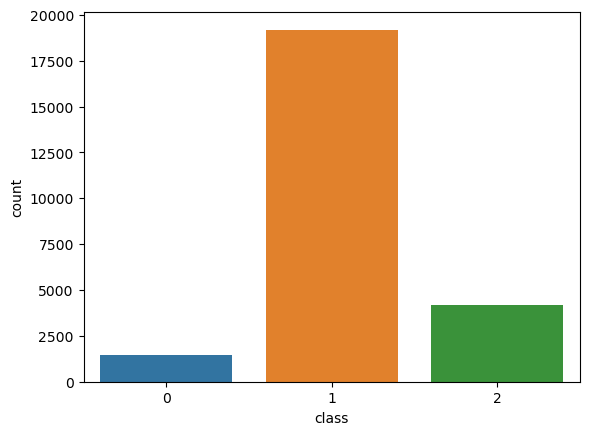

In [22]:
sns.countplot(x="class", data = df)

# CNN

In [23]:
# Define the CNN model
model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=X_padded.shape[1]))
model_cnn.add(Conv1D(128, 5, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(3, activation='softmax'))  # 3 classes: 0, 1, 2

In [24]:
# Compile the model
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# Train the model
model_cnn.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
496/496 [==============================] - 20s 37ms/step - loss: 0.3990 - accuracy: 0.8604 - val_loss: 0.2512 - val_accuracy: 0.9181
Epoch 2/5
496/496 [==============================] - 20s 39ms/step - loss: 0.1977 - accuracy: 0.9298 - val_loss: 0.2712 - val_accuracy: 0.9077
Epoch 3/5
496/496 [==============================] - 53s 107ms/step - loss: 0.0889 - accuracy: 0.9711 - val_loss: 0.3229 - val_accuracy: 0.8981
Epoch 4/5
496/496 [==============================] - 17s 35ms/step - loss: 0.0272 - accuracy: 0.9922 - val_loss: 0.3793 - val_accuracy: 0.8888
Epoch 5/5
496/496 [==============================] - 22s 44ms/step - loss: 0.0087 - accuracy: 0.9981 - val_loss: 0.4340 - val_accuracy: 0.8911


In [26]:
accuracy_cnn = model_cnn.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {accuracy_cnn}")

155/155 [==============================] - 1s 7ms/step - loss: 0.4692 - accuracy: 0.8804
Test Accuracy: 0.8803712129592896


In [27]:
y_pred= model_cnn.predict(X_test)
round_predictions = [round(pred[0]) for pred in y_pred]
print("\nclassification_report:")
print(classification_report(y_test, round_predictions ))

155/155 [==============================] - 1s 6ms/step

classification_report:
              precision    recall  f1-score   support

           0       0.04      0.73      0.08       290
           1       0.53      0.03      0.05      3832
           2       0.00      0.00      0.00       835

    accuracy                           0.06      4957
   macro avg       0.19      0.25      0.05      4957
weighted avg       0.41      0.06      0.05      4957



C:\Users\jahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jahna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
print(f"Test Accuracy: {accuracy_lstm}")
print(f"Test Accuracy: {accuracy_rnn}")
print(f"Test Accuracy: {accuracy_cnn}")

Test Accuracy: 0.8668549656867981
Test Accuracy: 0.8543474078178406
Test Accuracy: 0.8803712129592896


In [29]:
# Predicting the output
test_data = ["Lmao @SWILLA_LO: The d.rose adidas are lighter than my phone .... Shit is retarded"]
test_seq = tokenizer.texts_to_sequences(test_data)
test_padded = pad_sequences(test_seq, maxlen=X_padded.shape[1])
predictions = model_cnn.predict(test_padded)
predicted_class = predictions.argmax(axis=-1)

print(f"Predicted Class: {predicted_class}")
if(predicted_class==0):
  print("Hate speech detected")
elif(predicted_class==1):
   print("offensive language detected")
elif(predicted_class==2):
   print("No hate and offensive speech")

1/1 [==============================] - 0s 65ms/step
Predicted Class: [1]
offensive language detected
